<a href="https://colab.research.google.com/github/amnnsharma/GlidePro/blob/main/Pump_Off_Control_SRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PCP WELL SECTION

<Figure size 640x480 with 0 Axes>

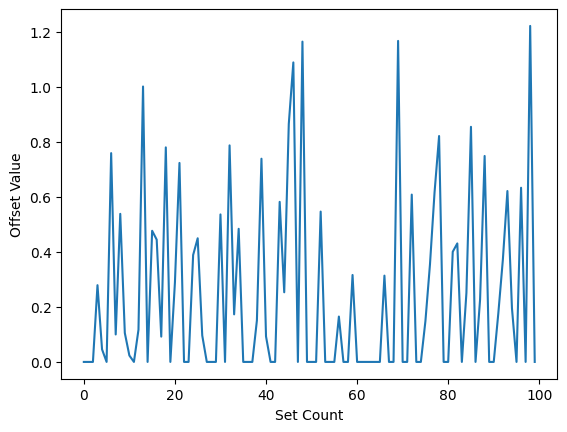

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
num_sets = 100  # Number of sets of waves
num_points = 100  # Number of points in each wave
time_period = 20  # Time period of each wave (seconds)
noise_level = 0.1  # Level of noise to add

# Generate time values
t = np.linspace(0, time_period, num_points)

# Create subplots
fig, axs = plt.subplots(num_sets, figsize=(10, 20))

offsets=[]

for i in range(num_sets):
    # Generate random amplitude for the current wave
    A = np.random.uniform(0.5, 2.0)  # Random amplitude between 0.5 and 2.0

    # Generate sinusoidal current values with noise for upstroke
    noise1 = np.random.normal(0, noise_level, num_points)
    current1 = A * np.cos(2 * np.pi * t / time_period + np.pi)

    # Generate random amplitude for the current wave
    B = np.random.uniform(0.5, 2.0)  # Random amplitude between 0.5 and 2.0
    if B == A:
        B = 0.9 * A

    # Generate sinusoidal current values with noise for downstroke
    noise2 = np.random.normal(0, noise_level, num_points)
    current2 = min(A, B) * np.cos(2 * np.pi * t / time_period + np.pi)

    offset_factor = ((max(current1) - min(current1)) - (max(current2) - min(current2))) / 2
    offsets.append(offset_factor)

    current2 = (lambda x, num: x - num)(current2, offset_factor)

    current1=current1 + noise1
    current2=current2 + noise2

    current = np.concatenate((current1, current2), axis=None)
    min_current=min(current)
    current = current - min_current
    t_plot = np.concatenate((t, t + max(t)), axis=None)
    # Plot current values
    axs[i].plot(t_plot, current, label=f'Set {i + 1}')
    axs[i].axhline(y=max(current1)-min_current, color='r', linestyle='--')
    axs[i].axhline(y=max(current2)-min_current, color='b', linestyle='--')
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Current')
    axs[i].legend()
    plt.close()


plt.tight_layout()
plt.show()


plt.plot(offsets)
plt.xlabel("Set Count")
plt.ylabel("Offset Value")
plt.show()


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
import pandas as pd
%cd /content/drive/My Drive/
df= pd.read_excel("PCP Well.xlsx")

/content/drive/My Drive


In [37]:
df.head(10)

,This spreadsheet contains interval data only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Interval data is retrieved for PI Point and PI...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Start Time,2024-03-27 16:10:24.258000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,End Time,2024-04-27 16:10:24.258000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Interval,1h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,\\ONGC_AF_SERVER\Well_data\Mehsana\Area1\Bechr...,\\ONGC_AF_SERVER\Well_data\Mehsana\Area1\Bechr...,\\ONGC_AF_SERVER\Well_data\Mehsana\Area1\Bechr...,\\ONGC_AF_SERVER\Well_data\Mehsana\Area1\Bechr...,\\ONGC_AF_SERVER\Well_data\Mehsana\Area1\Bechr...,\\ONGC_AF_SERVER\Well_data\Mehsana\Area1\Bechr...,\\ONGC_AF_SERVER\Well_data\Mehsana\Area1\Bechr...,\\ONGC_AF_SERVER\Well_data\Mehsana\Area1\Bechr...,\\ONGC_AF_SERVER\Well_data\Mehsana\Area1\Bechr...,\\ONGC_AF_SERVER\Well_data\Mehsana\Area1\Bechr...,\\ONGC_AF_SERVER\Well_data\Mehsana\Area1\Bechr...,\\ONGC_AF_SERVER\Well_data\Mehsana\Area1\Bechr...,\\ONGC_AF_SERVER\Well_data\Mehsana\Area1\Bechr...,\\ONGC_AF_SERVER\Well_data\Mehsana\Area1\Bechr...,\\ONGC_AF_SERVER\Well_data\Mehsana\Area1\Bechr...,\\ONGC_AF_SERVER\Well_data\Mehsana\Area1\Bechr...
5,2024-03-27 16:10:24.258000,438.660583,440.196991,442.93042,6938,PCP Well,BEC10,4.286992,3.887968,3.862032,0,0,0,0,0,7055.459961,ON
6,2024-03-27 17:10:24.258000,442.224365,444.032806,444.771881,6938,PCP Well,BEC10,4.473367,4.135347,4.07198,0,0,0,0,0,7055.459961,ON
7,2024-03-27 18:10:24.258000,449.17276,451.755493,451.79599,6938,PCP Well,BEC10,4.194499,3.735917,3.66,0,0,0,0,0,7055.459961,ON
8,2024-03-27 19:10:24.258000,447.213837,450.423523,450.726746,6938,PCP Well,BEC10,4.116089,3.912179,3.643911,0,0,0,0,0,7055.459961,ON
9,2024-03-27 20:10:24.258000,449.327209,452.297699,452.86087,6938,PCP Well,BEC10,4.267616,3.897152,3.687616,0,0,0,0,0,7055.459961,ON


In [38]:
df = df.iloc[5:, :2]

In [39]:
df.reset_index(drop=True, inplace=True)

In [40]:
df.columns=['date', 'voltage']

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [48]:
df['date'] = pd.to_datetime(df['date'])

In [49]:
df

,date,voltage
0,2024-03-27 16:10:24.258,438.660583
1,2024-03-27 17:10:24.258,442.224365
2,2024-03-27 18:10:24.258,449.17276
3,2024-03-27 19:10:24.258,447.213837
4,2024-03-27 20:10:24.258,449.327209
...,...,...
740,2024-04-27 12:10:24.258,434.248871
741,2024-04-27 13:10:24.258,435.394409
742,2024-04-27 14:10:24.258,429.710266
743,2024-04-27 15:10:24.258,433.977264


In [50]:
advanced_decomposition = STL(df.voltage, period=4).fit()

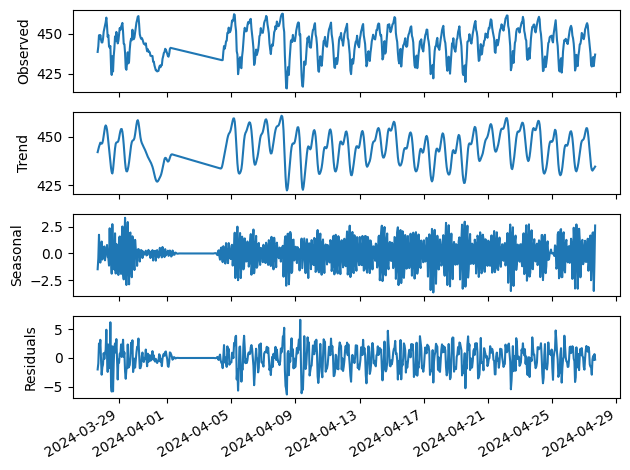

In [54]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

ax1.plot(df.date, advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(df.date,advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(df.date,advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(df.date,advanced_decomposition.resid)
ax4.set_ylabel('Residuals')


fig.autofmt_xdate()
plt.tight_layout()


In [55]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [60]:
ADF_result = adfuller(np.diff(df.voltage, n=1))

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -16.40171187112112
p-value: 2.6343506717672916e-29


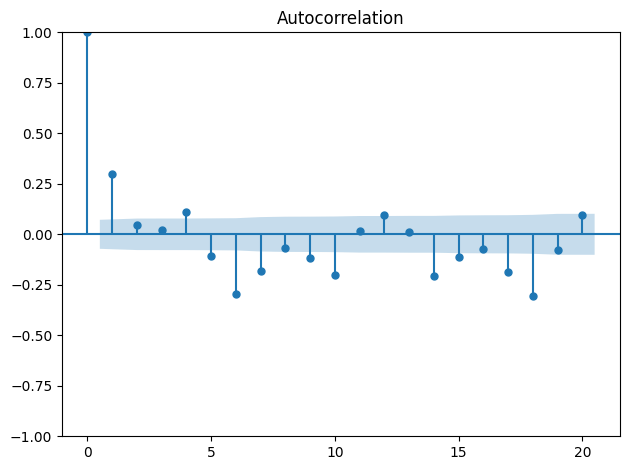

In [62]:
plot_acf(np.diff(df.voltage, n=1), lags=20)

plt.tight_layout()

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
import tqdm
from itertools import product
from typing import Union


def optimize_SARIMA(endog: Union[pd.Series, list], order_list: list, d: int, D: int, s: int) -> pd.DataFrame:

    results = []

    for order in tqdm.notebook.tqdm(order_list):
        try:
            model = SARIMAX(
                endog,
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except Exception as e:
            print(e)

            continue

        aic = model.aic
        results.append([order, aic])
    print("hi",results)
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']

    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [ ]:
ps = range(0, 13, 1)
qs = range(0, 13, 1)
Ps = [0]
Qs = [0]

d = 2
D = 0
s = 12

ARIMA_order_list = list(product(ps, qs, Ps, Qs))

train=df['voltage'][:-50].astype(float)

ARIMA_result_df = optimize_SARIMA(train, ARIMA_order_list, d, D, s)
ARIMA_result_df

# SRP WELL SECTION


In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
import tqdm
from itertools import product
from typing import Union
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose, STL


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
%cd /content/drive/My Drive/
df= pd.read_excel("SRP Well.xlsx", sheet_name='4')

/content/drive/My Drive


In [33]:
df.columns=['date', 'voltage1', 'voltage1', 'voltage1','power1','name', 'current1', 'current2', 'current3', 'power2', 'status']

In [34]:
df

,date,voltage1,voltage1,voltage1,power1,name,current1,current2,current3,power2,status
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
745,2024-04-30 14:03:24.546,427.782104,428.782104,430.782104,18499840.0,GM197,6.979013,6.897690,7.200804,13718076.0,ON
746,2024-04-30 15:03:24.546,426.000000,427.000000,428.000000,18500042.0,GM197,0.000000,0.000000,0.000000,0.0,OFF
747,2024-04-30 16:03:24.546,432.028137,433.028137,435.000000,18500058.0,GM197,9.067492,8.902276,9.349333,18033646.0,ON
748,2024-04-30 17:03:24.546,435.000000,436.000000,438.000000,18502698.0,GM197,9.059199,8.859199,9.359199,18558374.0,ON


In [35]:
df = df.iloc[5:, :]
df.reset_index(drop=True, inplace=True)
#df['date'] = pd.to_datetime(df['date'])
df = df[df['status'] == 'ON']
df=df.drop(df.columns[[5, 10]], axis=1)
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d %H:%M:%S')
df

,date,voltage1,voltage1,voltage1,power1,current1,current2,current3,power2
0,2024-03-30 18:03:24,458.000000,459.000000,460.000000,16840636.0,6.530000,6.380000,6.900000,16874384.0
1,2024-03-30 19:03:24,458.000000,459.000000,460.000000,16840636.0,6.530000,6.380000,6.900000,16874384.0
2,2024-03-30 20:03:24,458.000000,459.000000,460.000000,16840636.0,6.530000,6.380000,6.900000,16874384.0
3,2024-03-30 21:03:24,458.000000,459.000000,460.000000,16840636.0,6.530000,6.380000,6.900000,16874384.0
4,2024-03-30 22:03:24,458.000000,459.000000,460.000000,16840636.0,6.530000,6.380000,6.900000,16874384.0
...,...,...,...,...,...,...,...,...,...
739,2024-04-30 13:03:24,429.871246,431.000000,432.000000,18497012.0,9.141068,9.028493,9.392356,18534080.0
740,2024-04-30 14:03:24,427.782104,428.782104,430.782104,18499840.0,6.979013,6.897690,7.200804,13718076.0
742,2024-04-30 16:03:24,432.028137,433.028137,435.000000,18500058.0,9.067492,8.902276,9.349333,18033646.0
743,2024-04-30 17:03:24,435.000000,436.000000,438.000000,18502698.0,9.059199,8.859199,9.359199,18558374.0


In [36]:
df.shape

(677, 9)

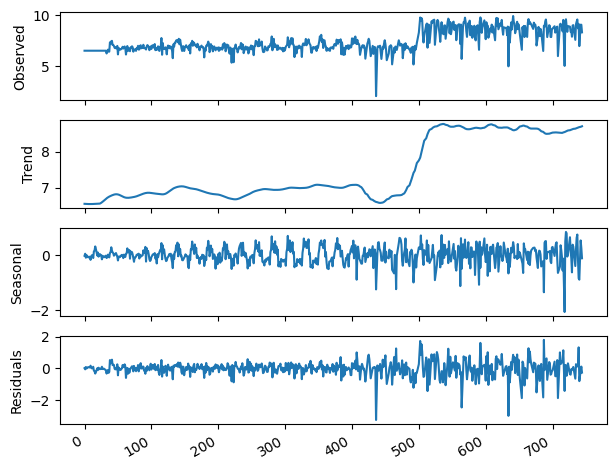

In [45]:
period=24

advanced_decomposition = STL(df.current1, period=period).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

ax1.plot( advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')


fig.autofmt_xdate()
plt.tight_layout()

In [58]:
trend=advanced_decomposition.trend.to_list()

In [59]:
len(trend)

677

In [62]:
trend[421]

6.77252876225613

ALERT:
Since 2024-04-01 06:03:24
#Load is increaing on the SRP system
#Unit balancing needed


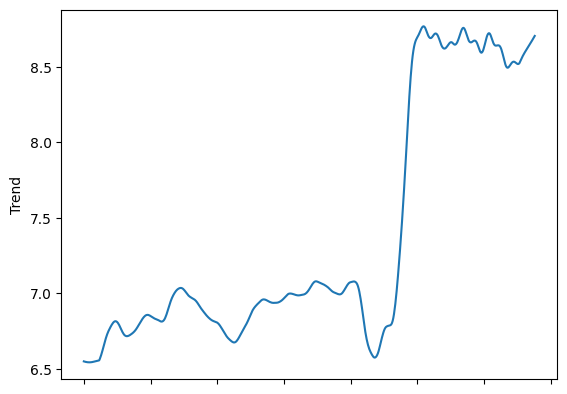

In [70]:
load_increase=False
for i in range(period, len(advanced_decomposition.trend)):
  #print(i, i-period)
  #print((trend[i]> trend[i-period] and trend[i]<1.2*trend[i-period]) or (trend[i]< trend[i-period] and trend[i]>1.2*trend[i-period]))
  if (trend[i]> trend[i-period] and trend[i]<1.2*trend[i-period]) or (trend[i]< trend[i-period] and trend[i]>1.2*trend[i-period]):
    pass
  else:
    load_increase=True
    print("ALERT:")
    print("Since "+str(df['date'].to_list()[i-period]))
    print("#Load is increaing on the SRP system")
    print("#Unit balancing needed")
    fig, ax=plt.subplots()
    ax.plot(trend)
    ax.set_ylabel('Trend')
    ax.set_xticklabels([])
    plt.show()
    break
  #if load_increase==True:
    #print("ATTENTION!!!!")

In [177]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [178]:
ADF_result = adfuller(np.diff(df.current1, n=1))

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -11.432532341653992
p-value: 6.464215856889524e-21


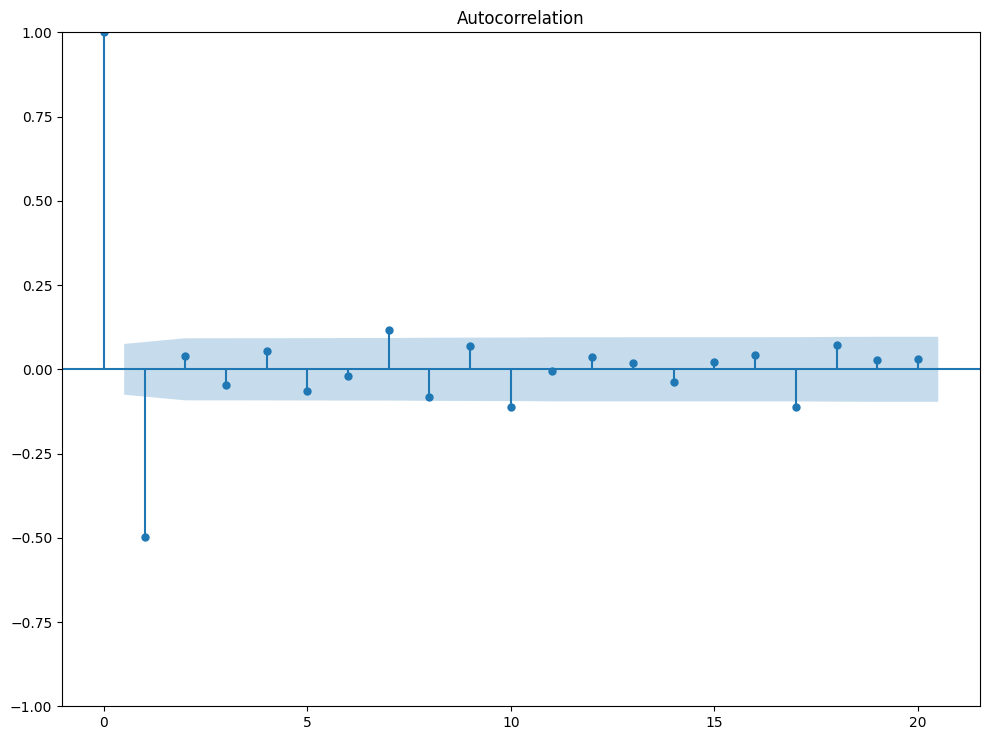

In [179]:
plot_acf(np.diff(df.current1, n=1), lags=20)

plt.tight_layout()

In [180]:
from prophet import Prophet
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics

from sklearn.metrics import mean_absolute_error

from itertools import product

import warnings
warnings.filterwarnings('ignore')

In [181]:
plt.rcParams['figure.figsize'] = (10, 7.5)
plt.rcParams['axes.grid'] = False

In [182]:
df=df[['date', 'current1']]
df.columns=['ds','y']
train = df[:-50]
test = df[-50:]

In [183]:
train['ds']=pd.to_datetime(train['ds'])
train.shape

(627, 2)

In [187]:
train.reset_index(drop=True, inplace=True)

In [188]:
test['ds']=pd.to_datetime(test['ds'])
test.shape

(50, 2)

In [189]:
test.reset_index(drop=True, inplace=True)

In [209]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=50, freq='H')
print(future.shape)
forecast = m.predict(future)
print(forecast.shape)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq1hu57gn/x49yir1i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq1hu57gn/fvc9_kve.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23786', 'data', 'file=/tmp/tmpq1hu57gn/x49yir1i.json', 'init=/tmp/tmpq1hu57gn/fvc9_kve.json', 'output', 'file=/tmp/tmpq1hu57gn/prophet_modelnv1vbr7g/prophet_model-20240430201831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:18:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:18:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


(677, 1)
(677, 19)


,ds,yhat,yhat_lower,yhat_upper
0,2024-03-30 18:03:24.546,6.831681,6.143093,7.551811
1,2024-03-30 19:03:24.546,6.667990,5.978206,7.334606
2,2024-03-30 20:03:24.546,6.459157,5.712472,7.095360
3,2024-03-30 21:03:24.546,6.306641,5.609280,7.015408
4,2024-03-30 22:03:24.546,6.264244,5.567585,6.982182
...,...,...,...,...
672,2024-04-30 00:03:24.546,9.230897,8.540276,9.949667
673,2024-04-30 01:03:24.546,9.332851,8.602969,10.075538
674,2024-04-30 02:03:24.546,9.395753,8.654523,10.039939
675,2024-04-30 03:03:24.546,9.393942,8.627946,10.036658


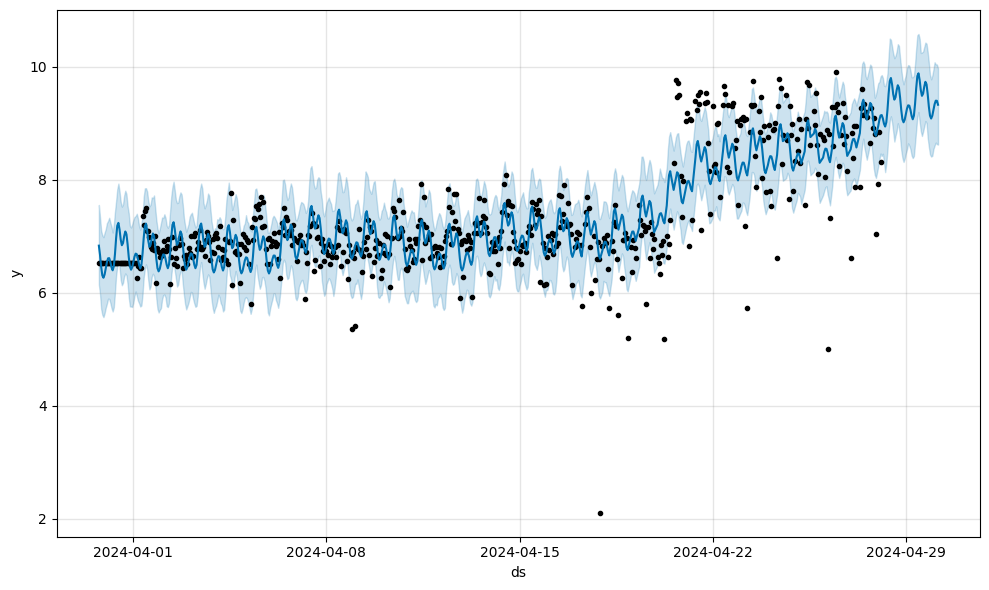

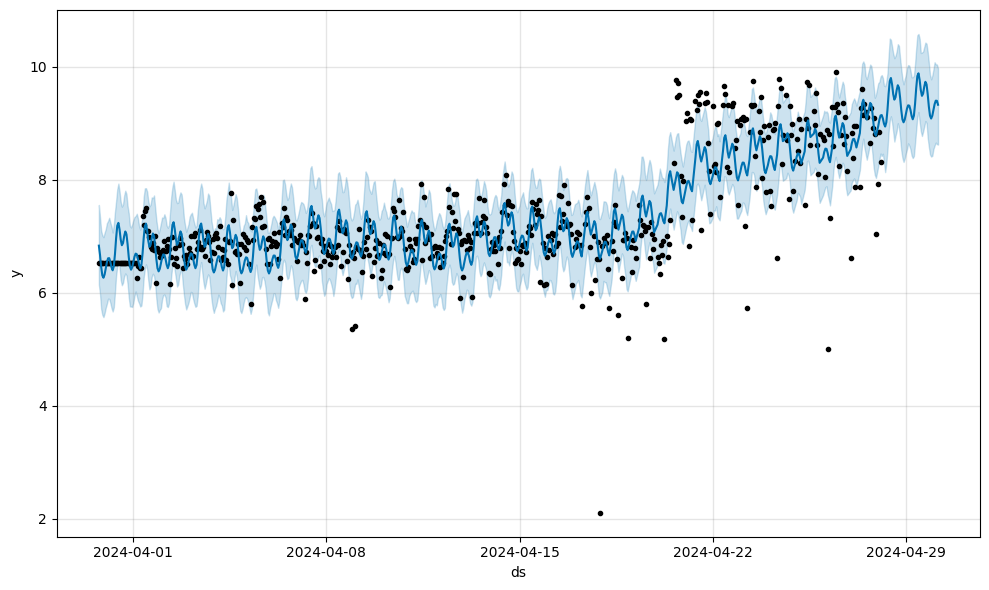

In [210]:
m.plot(forecast)

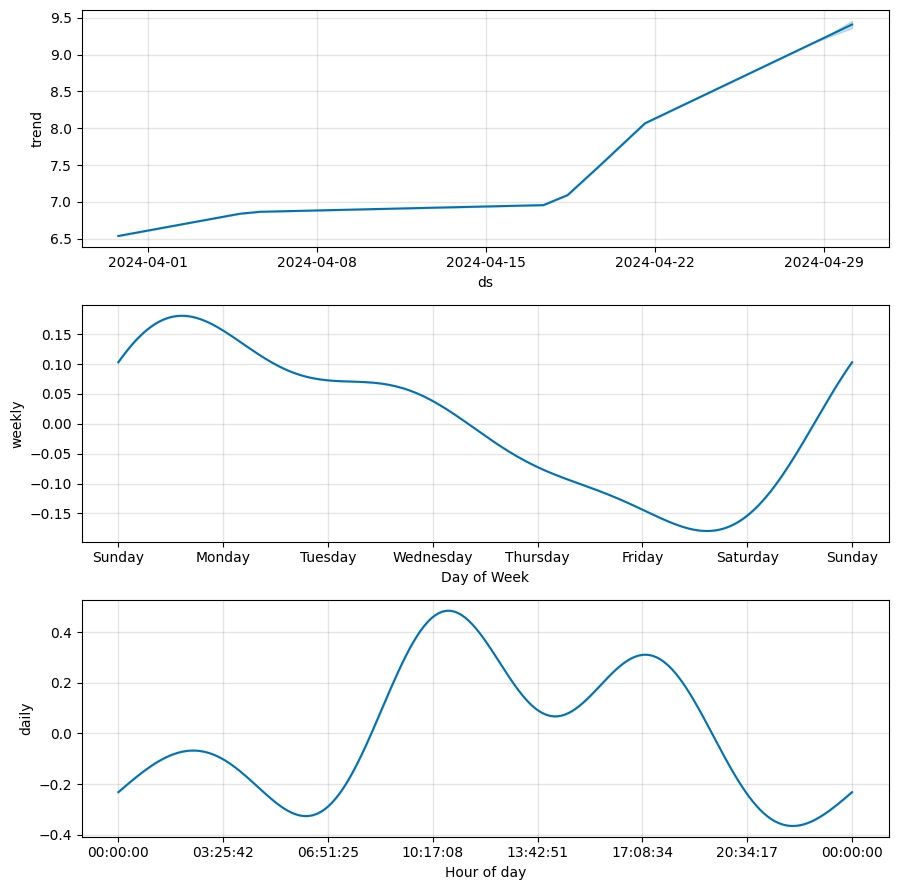

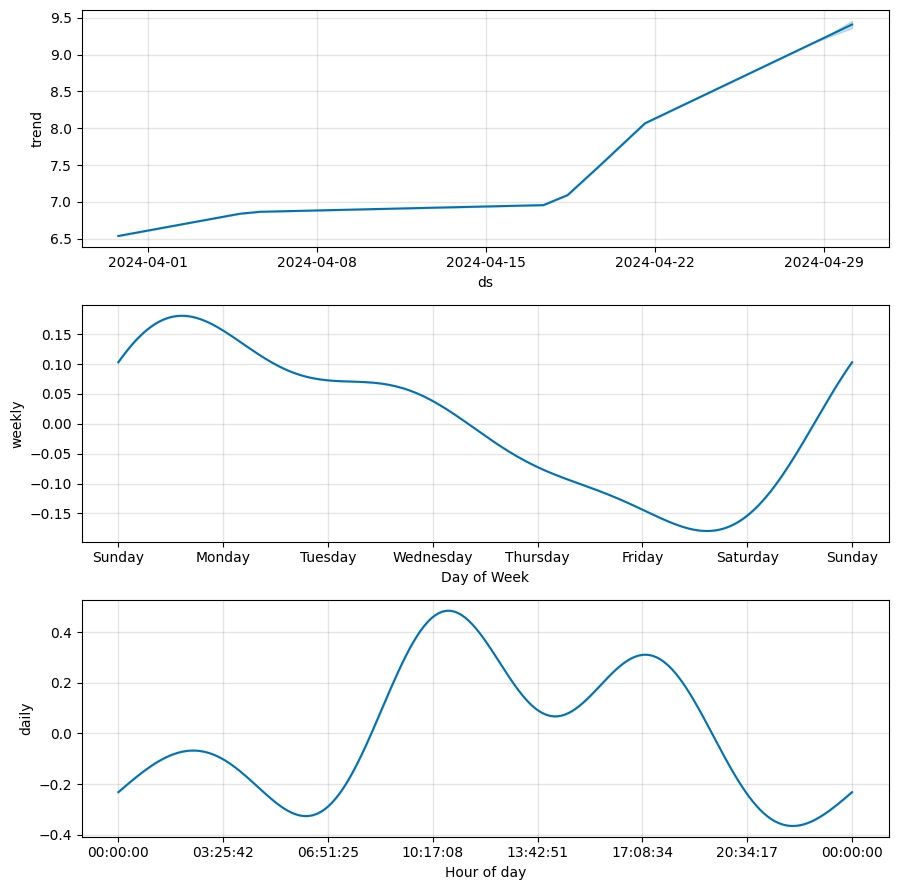

In [211]:
m.plot_components(forecast)

In [192]:
forecast.reset_index(drop=True, inplace=True)

In [193]:
forecast.shape

(677, 19)

In [194]:
test

,ds,y
0,2024-04-28 03:03:24.546,7.949500
1,2024-04-28 04:03:24.546,8.659343
2,2024-04-28 05:03:24.546,8.422954
3,2024-04-28 08:03:24.546,6.503767
4,2024-04-28 09:03:24.546,8.960000
5,2024-04-28 10:03:24.546,8.847548
6,2024-04-28 11:03:24.546,9.364697
7,2024-04-28 12:03:24.546,9.573962
8,2024-04-28 13:03:24.546,8.976000
9,2024-04-28 14:03:24.546,7.859227


In [195]:
forecast=forecast[['yhat', 'yhat_lower', 'yhat_upper']][-50:]

In [196]:
forecast.reset_index(drop=True, inplace=True)

In [197]:
test[['yhat', 'yhat_lower', 'yhat_upper']] = forecast[['yhat', 'yhat_lower', 'yhat_upper']]
test.head()

,ds,y,yhat,yhat_lower,yhat_upper
0,2024-04-28 03:03:24.546,7.949500,9.141778,8.475036,9.876004
1,2024-04-28 04:03:24.546,8.659343,9.080681,8.382264,9.763608
2,2024-04-28 05:03:24.546,8.422954,8.987581,8.308307,9.692652
3,2024-04-28 08:03:24.546,6.503767,8.938792,8.254071,9.657798
4,2024-04-28 09:03:24.546,8.960000,9.012950,8.303858,9.734073


In [198]:
test['baseline'] = train['y'][-50:].values
test.head()

,ds,y,yhat,yhat_lower,yhat_upper,baseline
0,2024-04-28 03:03:24.546,7.949500,9.141778,8.475036,9.876004,9.680220
1,2024-04-28 04:03:24.546,8.659343,9.080681,8.382264,9.763608,8.617383
2,2024-04-28 05:03:24.546,8.422954,8.987581,8.308307,9.692652,9.204837
3,2024-04-28 08:03:24.546,6.503767,8.938792,8.254071,9.657798,8.964043
4,2024-04-28 09:03:24.546,8.960000,9.012950,8.303858,9.734073,9.529994


In [199]:
from sklearn.metrics import mean_absolute_error

prophet_mae = mean_absolute_error(test['y'], test['yhat'])
baseline_mae = mean_absolute_error(test['y'], test['baseline'])

print(prophet_mae)
print(baseline_mae)

0.8603254227659075
0.7566275119781501


In [201]:
test.iloc[49]

ds            2024-04-30 18:03:24.546000
y                                   8.32
yhat                            9.324429
yhat_lower                      8.555882
yhat_upper                     10.034584
baseline                        8.306691
Name: 49, dtype: object

In [203]:
test.index = range(int(train.shape[0]), 50 + int(train.shape[0]))

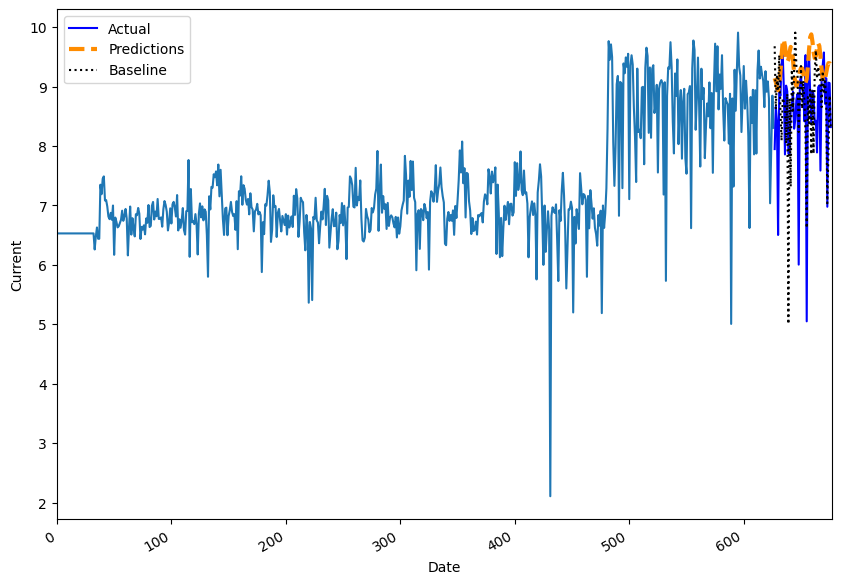

In [207]:
fig, ax = plt.subplots()

ax.plot(train['y'])
ax.plot(test['y'], 'b-', label='Actual')
ax.plot(test['yhat'], color='darkorange', ls='--', lw=3, label='Predictions')
ax.plot(test['baseline'], 'k:', label='Baseline')

ax.set_xlabel('Date')
ax.set_ylabel('Current')

ax.axvspan(3285, 3649, color='#808080', alpha=0.1)

ax.legend(loc='best')

#plt.xticks(
#    [3224, 3254, 3285, 3316, 3344, 3375, 3405, 3436, 3466, 3497, 3528, 3558, 3589, 3619],
#    ['Nov', 'Dec', 'Jan 1990', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#plt.fill_between(x=test.index, y1=test['yhat_lower'], y2=test['yhat_upper'], color='lightblue')
plt.xlim(0, test.shape[0]+train.shape[0])

fig.autofmt_xdate()
#plt.tight_layout()

#plt.savefig('figures/CH19_F03_peixeiro.png', dpi=300)

KeyError: 'ds'

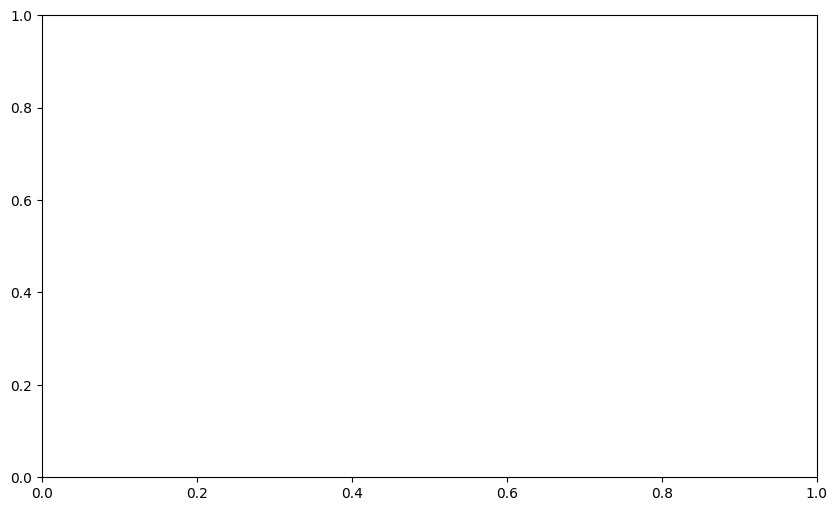

In [208]:
#m.plot(forecast)